# Ch02 CUSUM Filter 

In [13]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime

from adv_finance import bars
from adv_finance import labeling
from adv_finance import utils



In [14]:
df = pd.read_csv("TRADE_A233740_2019_DV.csv")
df.timestamp = df.timestamp.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
df = df.set_index('timestamp')


In [18]:
close = df[['open', 'high', 'low', 'close', 'vol']]
daily_vol = utils.get_daily_vol(close)

In [19]:
cusum_events = labeling.cusum_filter(df['close'], threshold=daily_vol['close'].mean() * 0.5)

In [20]:
df_sample = df.loc[cusum_events]


In [21]:
df_0305 = df.loc['2019-03-05']
df_sample_0305 = df_sample.loc['2019-03-05']

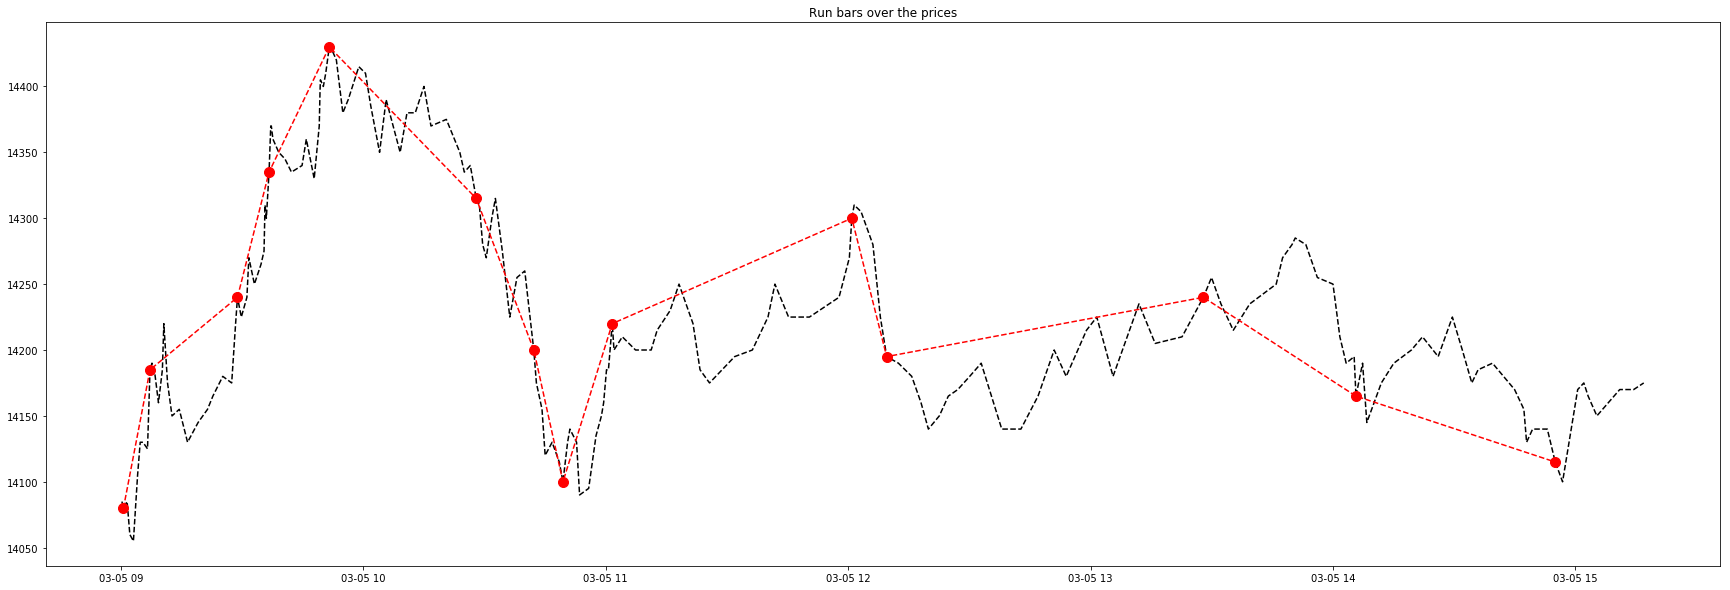

In [22]:
plt.figure(figsize=(30, 10))
plt.title('Run bars over the prices')
plt.plot(df_0305.index.values, df_0305.close.values, label='raw_prices', ls='--', color='black')
plt.plot(df_sample_0305.index.values, df_sample_0305.close.values, label='cusum_sample', ls='--', markersize=10, marker='o', color='red')

plt.show()

In [96]:
df_sample.shape

(265, 6)